In [178]:
import pandas as pd
from plotnine import *
import random
import numpy as np
import plotly.express as px
import plotly.offline as py


# Reading data

In [238]:
df = pd.read_csv('data/preprocessed_data.csv')
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


# Heatmap

In [239]:
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', u'HourlyRate', u'JobLevel',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked', u'PercentSalaryHike',
             u'StockOptionLevel', u'TotalWorkingYears', u'TrainingTimesLastYear', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager', u'Attrition']
data = [
    go.Heatmap(
        z=df[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=df[numerical].columns.values,
        y=df[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0
    )
]
layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

# Outliers

In [240]:
colors = ['#af8dc3', '#7fbf7b','#af8dc3', '#7fbf7b', '#af8dc3', '#7fbf7b','#af8dc3', '#7fbf7b']
names = ['Distance From Home','Num Companies Worked','Percent Salary Hike','Total Working Years','Years At Company','Years In Current Role','Years Since Last Promotion','Years With Curr Manager']
atts = ['DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [241]:
fig = go.Figure()
for i in range(len(atts)): 
    fig.add_trace(go.Box(
        x=df[atts[i]],
        name=names[i],
        marker_color=colors[i]
    ))
fig.update_layout(
    xaxis=dict(zeroline=False),
    boxmode='group',
    template="plotly_white",
    showlegend=False, 
    title="Before detecting outliers",
)
fig.update_traces(orientation='h') # horizontal box plots
fig.write_html('images/data1.html')
fig.show()

In [242]:
def iqr_outliers(df, att):
    out = 0
    m = int(np.mean(df[att]))
    q1 = df[att].quantile(0.25)
    q3 = df[att].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df[att]:
        if i > Upper_tail or i < Lower_tail:
            out += 1
            df[att] = df[att].replace(i, m)

In [243]:
for att in atts:
    iqr_outliers(df, att)

In [244]:
fig = go.Figure()
for i in range(len(atts)): 
    fig.add_trace(go.Box(
        x=df[atts[i]],
        name=names[i],
        marker_color=colors[i]
    ))
fig.update_layout(
    xaxis=dict( zeroline=False),
    boxmode='group',
    template="plotly_white",
    showlegend=False,
    title="After detecting outliers",
)
fig.update_traces(orientation='h') # horizontal box plots
fig.write_html('images/data2.html')
fig.show()

In [245]:
color = '#af8dc3'
att = 'MonthlyIncome'
name ='Monthly Income'

In [246]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=df[att],
    name=name,
    marker_color=color
))
fig.update_layout(
    xaxis=dict( zeroline=False),
    boxmode='group',
    template="plotly_white",
    showlegend=False,
    title="Before detecting outliers",
)
fig.update_traces(orientation='h') # horizontal box plots
fig.write_html('images/data3.html')
fig.show()

In [247]:
df_copy = df.copy()
iqr_outliers(df_copy, att)

In [248]:
fig = go.Figure()

fig.add_trace(go.Box(
    x=df_copy[att],
    name=name,
    marker_color=color
))
fig.update_layout(
    xaxis=dict(zeroline=False),
    boxmode='group',
    template="plotly_white",
    showlegend=False,
    title="After detecting outliers",
)
fig.update_traces(orientation='h') # horizontal box plots
fig.write_html('images/data4.html')
fig.show()

# Search through data

In [121]:
temp_df=df.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

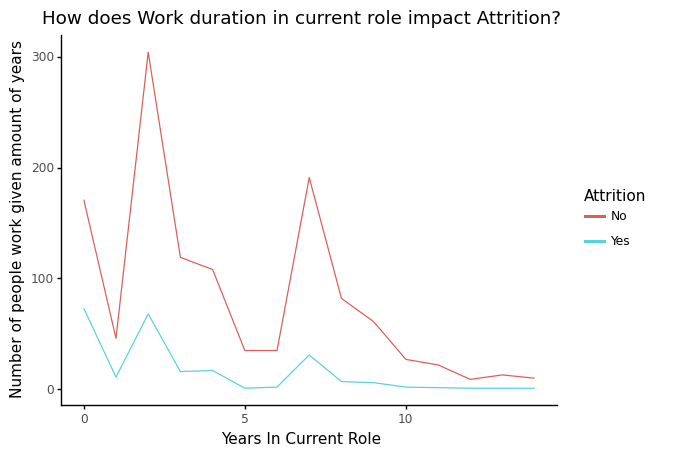

<ggplot: (-9223371872093832139)>

In [196]:
p = (ggplot(temp_df, aes(x='YearsInCurrentRole', y='Counts',color='Attrition'))
    + geom_line()
    + theme_classic()
    + ggtitle("How does Work duration in current role impact Attrition?")
    + ylab("Number of people work given amount of years")
    + xlab("Years In Current Role"))
p

In [207]:
p.save(filename = 'images/second.png', height=3, width=3, units = 'in', dpi=1000)

C:\Users\Krul\Anaconda3\lib\site-packages\plotnine\ggplot.py:721: PlotnineWarning:

Saving 3 x 3 in image.

C:\Users\Krul\Anaconda3\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning:

Filename: images/second.png



In [200]:
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [202]:
df['Attrition'].astype('category')

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Attrition, Length: 1470, dtype: category
Categories (1, int64): [1]

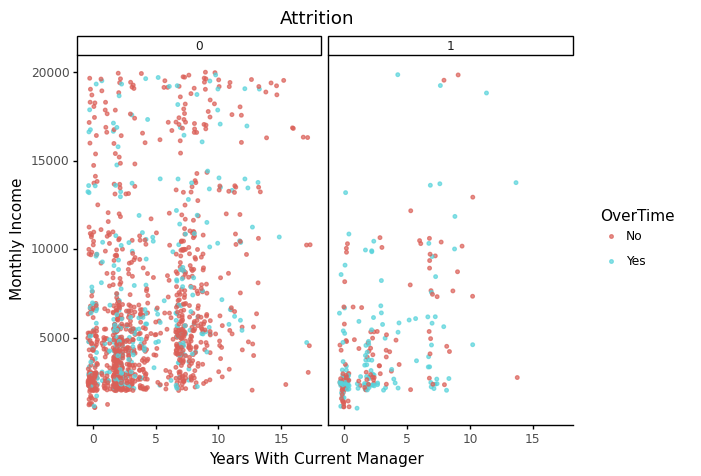

<ggplot: (-9223371872096051035)>

In [205]:
 p = (ggplot(df, aes(x='YearsWithCurrManager', y='MonthlyIncome', color='OverTime'))
    + geom_jitter(size = 1, alpha = 0.7)
    + theme_classic()
    + facet_wrap('~ Attrition')
    + ggtitle('Attrition')
    + ylab("Monthly Income")
    + xlab("Years With Current Manager") )
p

In [194]:
df["AvgWorkingYears"] = df["TotalWorkingYears"]/df["NumCompaniesWorked"]
df.loc[df["NumCompaniesWorked"] == 0, "AvgWorkingYears"] = None
df['Attrition'] = df['Attrition'].apply(lambda x: 'No' if x == 0 else 'Yes')

In [192]:
p = (ggplot(df, aes(x='AvgWorkingYears', y = 'YearsAtCompany', color = 'Attrition')) 
     + geom_point() 
     + facet_grid('EnvironmentSatisfaction~MaritalStatus')
     + theme_classic()
     + labs(title = 'How martial status and satisfaction from work environment influences Attrition', x='Average Working Years', y='Years At Company'))

In [187]:
fig

PlotnineError: "Could not evaluate the 'x' mapping: 'AvgWorkingYears' (original error: name 'AvgWorkingYears' is not defined)"

In [169]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

['AvgWorkingYears',
 'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition']

In [171]:
df.to_csv('data_outliers.csv', index = False)

In [175]:
import sys
print(sys.path)

['C:\\Users\\Krul\\Documents\\GitHub\\ibm-employees-predictions', 'C:\\Users\\Krul\\Anaconda3\\python37.zip', 'C:\\Users\\Krul\\Anaconda3\\DLLs', 'C:\\Users\\Krul\\Anaconda3\\lib', 'C:\\Users\\Krul\\Anaconda3', '', 'C:\\Users\\Krul\\AppData\\Roaming\\Python\\Python37\\site-packages', 'C:\\Users\\Krul\\Anaconda3\\lib\\site-packages', 'C:\\Users\\Krul\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.7.egg', 'C:\\Users\\Krul\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Krul\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Krul\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Krul\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Krul\\.ipython']
